In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
movie_data = pd.read_csv('./data/IMDB-Movie-Data.csv')
movie_data.describe()
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
# 获取其中的导演人数信息
directors = pd.unique(movie_data['Director'])
direc_num = directors.shape[0]
direc_num

644

In [4]:
# 获取平均分
ra_mean = movie_data.Rating.mean()
ra_mean

6.723199999999999

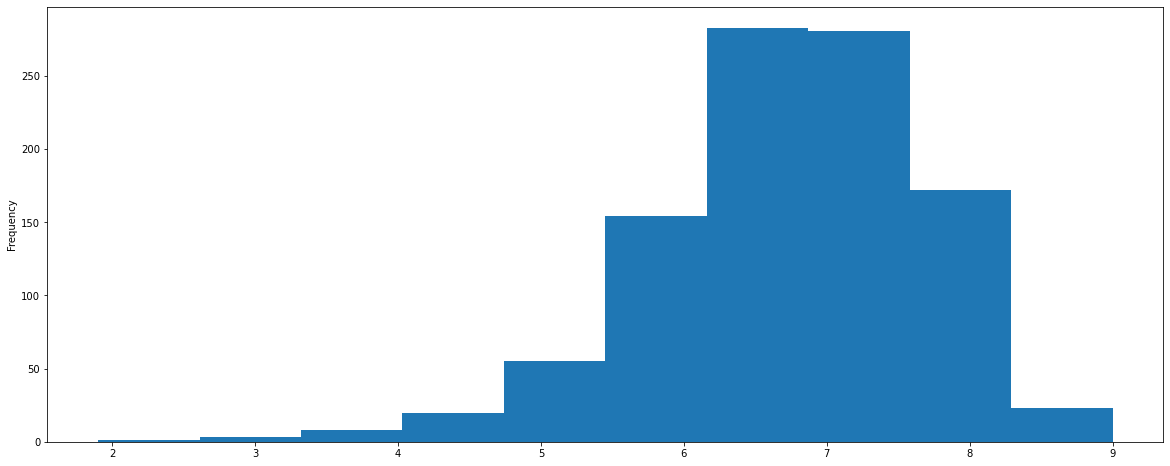

In [5]:
# 画图呈现数据
movie_data['Rating'].plot(kind = 'hist',figsize=(20,8))
plt.show()

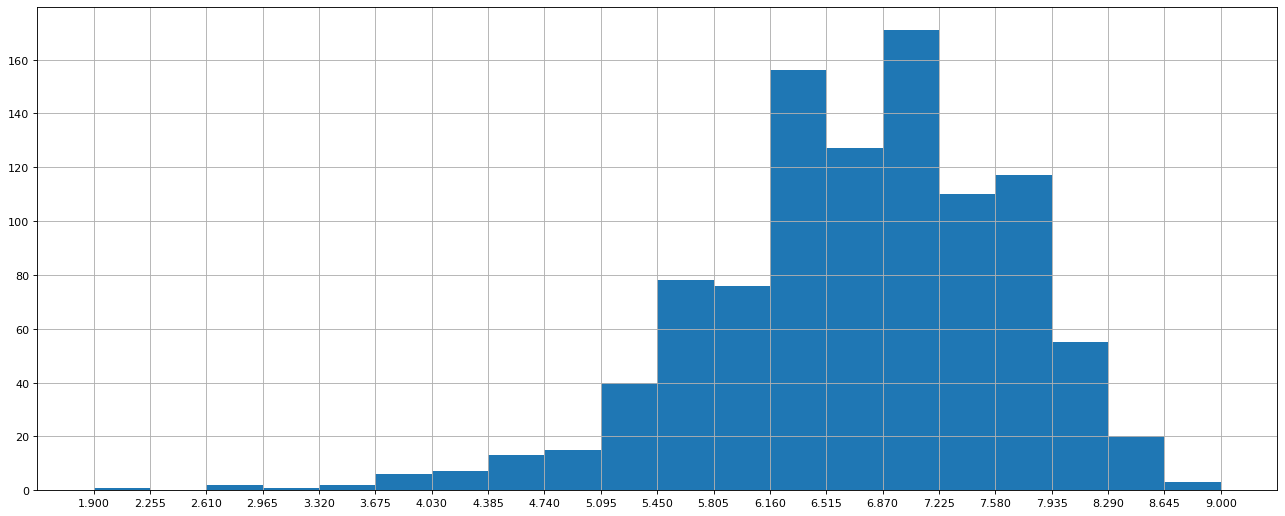

In [14]:
# 效果不好，换matplotlib
# 创建画布
plt.figure(figsize = (20,8),dpi = 80)
plt.hist(movie_data.Rating.values,bins=20)
# 取最大最小值，分成20组
ra_min = movie_data.Rating.min()
ra_max = movie_data.Rating.max()
# 分成多少组，刻度比组数多1
x_scale = np.linspace(ra_min,ra_max,num = 21)
y_scale = np.arange(0,15)
plt.xticks(x_scale)
plt.grid()
plt.show()

In [15]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [84]:
temp_list = [i.split(',') for i in movie_data['Genre']]
movie_data['Genre']
movie_data['Genre'].shape[0]

1000

In [53]:
genre_list = np.unique([j for i in temp_list for j in i])
genre_list.shape[0]
# genre_list

20

In [96]:
genre_df = pd.DataFrame(np.zeros([movie_data['Genre'].shape[0],genre_list.shape[0]]),columns = genre_list,dtype = int)
# genre_df.iloc[1,temp_list[1]]
loc = temp_list[1][0]
genre_df.loc[1,temp_list[1][0]]

0

In [97]:
# 定位到每一行，对应的类别换成1
for i in range(1000):
      genre_df.loc[i,temp_list[i]] = 1

<AxesSubplot:>

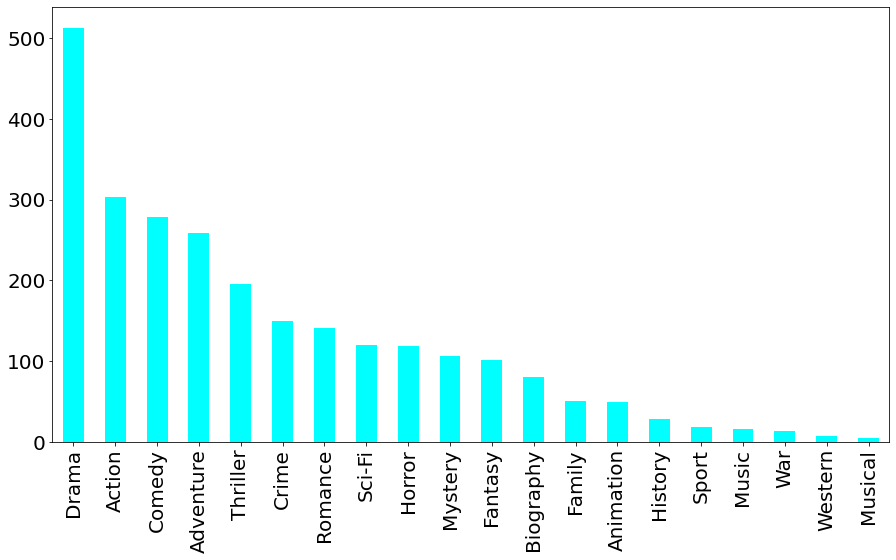

In [105]:
# 用pandas绘图
genre_df.sum().sort_values(ascending = False).plot(kind = 'bar',figsize = (15,8),fontsize = 20,colormap = 'cool')